In [1]:

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
filename = 'static/data/melon_song_v3.csv'
plist_filename1 = 'static/data/melon_playlist1.csv'
plist_filename2 = 'static/data/melon_playlist2_v2.csv'

In [3]:
df = pd.read_csv(filename)
plist1 = pd.read_csv(plist_filename1)
plist2 = pd.read_csv(plist_filename2)
df.shape, plist1.shape, plist2.shape

((6243, 14), (3845, 5), (60264, 5))

In [4]:
df.head(1)

,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq,ly_summary
0,418168,희재,성시경,발라드 국내영화,국화꽃 향기 OST,양재선,MGR,2003.02.01,https://cdnimg.melon.co.kr/cm/album/images/000...,332,138267,햇살은 우릴 위해 내리고\n바람도 서롤 감싸게 했죠\n우리 웃음속에 계절은 오고\n...,445029956 411111859,정말로 울면 내가 그댈 보내<br>준 것 같아서


In [5]:
a = df.genre.value_counts().head(10).to_frame()
a

,count
genre,
발라드,957
성인가요/트로트,818
댄스,692
랩/힙합,473
국내뮤지컬,470
록/메탈,467
R&B/Soul,458
발라드 국내드라마,350
포크/블루스,295


In [7]:
year = []
for i in df.date.values:
    if i == '-':
        year.append(0)
    else:
        a = int(i[:4])
        if 1960 <= a < 1970:
            year.append(1960)
        elif 1970 <= a < 1980: 
            year.append(1970)
        elif 1980 <= a < 1990: 
            year.append(1980)
        elif 1990 <= a < 2000: 
            year.append(1990)
        elif 2000 <= a < 2010: 
            year.append(2000)
        elif 2010 <= a < 2020: 
            year.append(2010)
        else:
            year.append(2020)

In [10]:
df['year'] = year
df.tail(3)

,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq,ly_summary,year
6240,2981597,서른 즈음에,김광석,포크/블루스,김광석 네번째,강승원,강승원,1994.06.25,https://cdnimg.melon.co.kr/cm/album/images/010...,13,5497,또 하루 멀어져 간다\n내뿜은 담배연기처럼\n작기만한 내 기억속에\n무얼 채워 살고...,485926496 408723261,매일 이별하며 살고 있구나<br>또 하루 멀어져 간다,1990
6241,34183979,인생 한잔,정은지,포크/블루스 국내드라마,술꾼도시여자들 OST Part 2,빨간양말,INAN,2021.10.29,https://cdnimg.melon.co.kr/cm2/album/images/10...,12,4512,사랑도 이별도 오늘은 잠시 미뤄보자\n불안한 청춘도 내일로 잠시 미뤄두자\n떠나버린...,506225967 434154554,사랑도 이별도 오늘은 잠시 미뤄보자<br>한잔 들이켜 보자 나를 돌이켜보자,2020
6242,31191637,6 o'clock,볼빨간사춘기,인디음악 포크/블루스,Red Diary 'Hidden Track',안지영,안지영,2018.07.17,https://cdnimg.melon.co.kr/cm/album/images/101...,87,15668,Its 6 oclock\n너와 나는 시간이 빨라서\n시간이 달라서\n어쩔 수 없이 ...,458080033 442957041,Oh why does it feel stupid<br>I just dont know,2010


In [11]:
g = df.year.value_counts().astype(int).to_frame()
g

,count
year,
2020,2182
2010,1899
2000,994
1990,678
1980,401
0,45
1970,42
1960,2


In [26]:
g6070 = pd.read_csv('static/data/melon_year6070_concat.csv')
g6070.head(1)

,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq
0,4083218,내일또 만납시다,금호동,성인가요/트로트,여인을 못잊어/그정 못잊어,전우,박춘석,20130401.0,https://cdnimg.melon.co.kr/cm/album/images/021...,13,263,하루의 일을 끝내고 돌아가는\r\n거리엔 사람의 물결\r\n하늘엔 별이 하나 둘 반...,460454132 518268022


In [27]:
gaga6070 = g6070.genre.value_counts().head(10).to_frame()
gaga6070

,count
genre,
성인가요/트로트,270
포크/블루스,85
발라드,39
록/메탈,17
국악 국악가요,5
발라드 성인가요/트로트,4
R&B/Soul,3
댄스,3


In [28]:
g6070li = []
for i in range(len(gaga6070.values)):
    abc = gaga6070.values[i][0]
    g6070li.append(abc)
g6070li

[270, 85, 39, 17, 5, 4, 3, 3]

In [38]:
threshold = 8 
def label_func(pct):
    if pct < threshold:
        return ''
    else:
        return f'{pct:.1f}%'

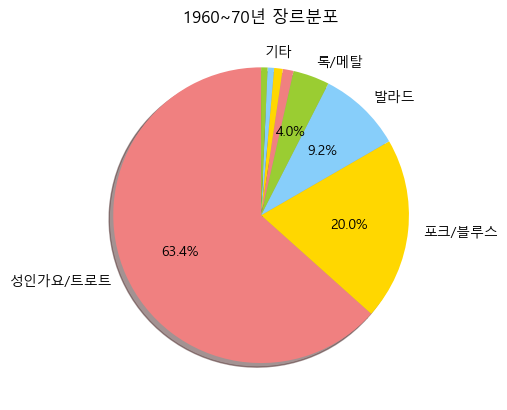

In [29]:
ratio = g6070li
labels = ['성인가요/트로트', '포크/블루스', '발라드', '록/메탈', '', '', '', '기타']
colors = ['lightcoral', 'gold', 'lightskyblue', 'yellowgreen' ]
explode = (0, 0.0, 0, 0,0,0,0,0) # 두번째 값이 밖으로 튀어 나오게해줘라
plt.pie(ratio, labels=labels , autopct=label_func, colors=colors, explode=explode,
         startangle=90, shadow=True) # 시작위치 90도 
plt.title('1960~70년 장르분포')
plt.show()

In [33]:
# 연도 입력, 장르 카테고리 확인
genre_year = df[df['year']== 1980] 
genre_year.groupby('genre')['year'].agg(['count']).sort_values(by='count', ascending=False).head(8)

,count
genre,
성인가요/트로트,153
발라드,100
포크/블루스,77
록/메탈,52
댄스,9
R&B/Soul,3
발라드 성인가요/트로트,2
국내영화,1


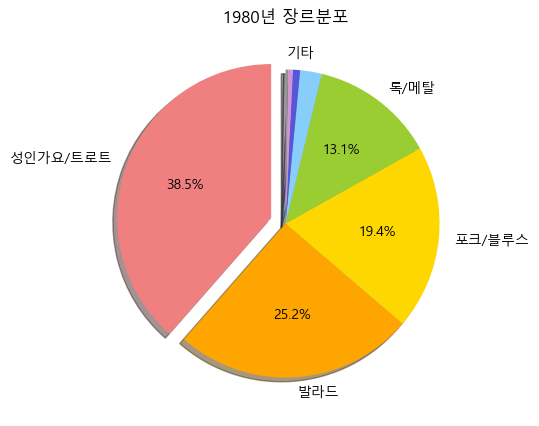

In [37]:
# genre_year = df[df['year']== 1990] 
gygy = genre_year.groupby('genre')['year'].agg(['count']).sort_values(by='count', ascending=False).head(8)
gy_li = []
for i in range(len(gygy.values)):
    abc = gygy.values[i][0]
    gy_li.append(abc)

threshold = 3 
def label_func(pct):
    if pct < threshold:
        return ''
    else:
        return f'{pct:.1f}%'


# ratio = g6070li
ratio = gy_li
labels = ['성인가요/트로트', '발라드', '포크/블루스', '록/메탈', '', '', '', '기타'] # 연도 수정후 카테고리 순위에 맞춰 수정하기
colors = ['lightcoral','#ffa500', 'gold', 'yellowgreen', 'lightskyblue', '#5656dd', '#d395d0', '#939695']
explode = (0.1, 0.0, 0, 0,0,0,0,0) 

plt.figure(figsize=(5,5))
plt.pie(ratio ,labels=labels, autopct=label_func, colors=colors, explode=explode,
         startangle=90, shadow=True) # autopct='%.1f%%'  #6070년도할때

plt.title('1980년 장르분포')
plt.show()